Notes: 

A quick overview of the workflow and its important parts 
Workflow:
fasta > convert to kmers > embed kmers to fixed dimensinal vector > run models
I generate kmers by sliding a fixed length window along each transcript. 
kmer size and ebedding dimension(edim) are connected:
kmer size determined the vocab size(set of unique words in a corpus)


Embedding were first used in NLP, so all the terminology is absed on text, so I'll provide a translation for this data set. 
Corpus - the complete set of documents used to train the embedding model. In this expereiment, the corpus is the set of all transcripts I'm contstructung mebeddings for(~600K transcripts)

Vocab size - number of unique words in a corpus, or number of unique kmers in this context. The upper bound for this is determiend by kmer size: vocab size = 4^k






 


In [2]:
import pandas as pd
import os 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np 
import plotnine as pn
os.chdir('/data/swamyvs/pacbio_testing/')

In [3]:
colnames=['experiment', '0-precision', '0-recall','0-f1-score', 
         '1-precision', '1-recall','1-f1-score', 'accuracy']
model_results=pd.read_csv('data/model_experiments/model_exp_results_v1.csv', names=colnames)

In [58]:
labs=(pd
 .DataFrame.from_records(model_results.experiment.str.split('=|_'))
 .assign(model=lambda x: x[5].str.cat(x[6], na_rep='') )
 .iloc[:,[1,3,7]]
 .rename(columns={1:'kmer', 3:'edim'})
 .assign(kmer=lambda x : pd.to_numeric(x['kmer']),
        edim=lambda x: pd.to_numeric(x['edim']))
 )

In [59]:
model_results=pd.concat([model_results, labs], axis=1)

In [60]:
model_results.sort_values('accuracy',ascending=False)

,experiment,0-precision,0-recall,0-f1-score,1-precision,1-recall,1-f1-score,accuracy,kmer,edim,model
36,kmer=10_edim=100_model=random_forest,0.788690,0.920139,0.849359,0.640625,0.366071,0.465909,0.765000,10,100,randomforest
61,kmer=8_edim=400_model=Dense,0.822795,0.858507,0.840272,0.590452,0.524554,0.555556,0.765000,8,400,Dense
57,kmer=8_edim=200_model=Dense,0.821429,0.858507,0.839559,0.588384,0.520089,0.552133,0.763750,8,200,Dense
25,kmer=8_edim=300_model=Dense,0.816026,0.866319,0.840421,0.591512,0.497768,0.540606,0.763125,8,300,Dense
8,kmer=10_edim=1000_model=random_forest,0.789751,0.909722,0.845502,0.619048,0.377232,0.468793,0.760625,10,1000,randomforest
...,...,...,...,...,...,...,...,...,...,...,...
14,kmer=8_edim=600_model=LSTM-wide,0.809019,0.794271,0.801577,0.494670,0.517857,0.505998,0.716875,8,600,LSTM-wide
39,kmer=10_edim=100_model=LSTM-long,0.806878,0.794271,0.800525,0.491416,0.511161,0.501094,0.715000,10,100,LSTM-long
34,kmer=10_edim=600_model=LSTM-wide,0.822430,0.763889,0.792079,0.486792,0.575893,0.527607,0.711250,10,600,LSTM-wide
6,kmer=8_edim=1000_model=LSTM-wide,0.794850,0.803819,0.799309,0.480460,0.466518,0.473386,0.709375,8,1000,LSTM-wide


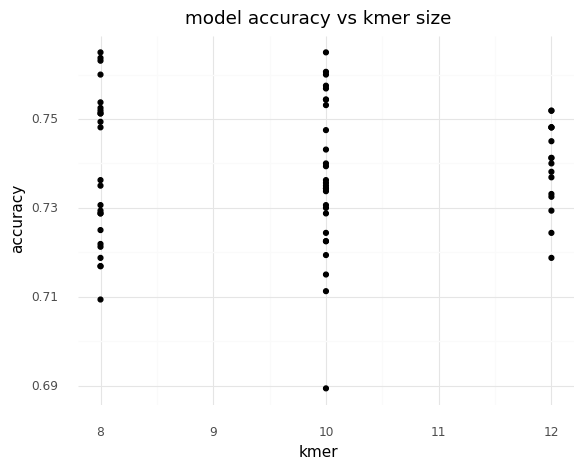

<ggplot: (2932105905013)>

In [61]:
(pn.ggplot(model_results) +
pn.geom_point(pn.aes(x='kmer', y='accuracy')) +
pn.ggtitle('model accuracy vs kmer size')+
pn.theme_minimal())

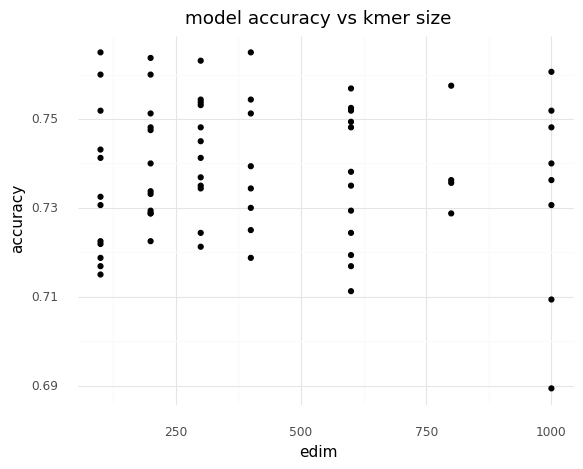

<ggplot: (2932105915885)>

In [62]:
(pn.ggplot(model_results) +
pn.geom_point(pn.aes(x='edim', y='accuracy')) +
pn.ggtitle('model accuracy vs kmer size')+
pn.theme_minimal())

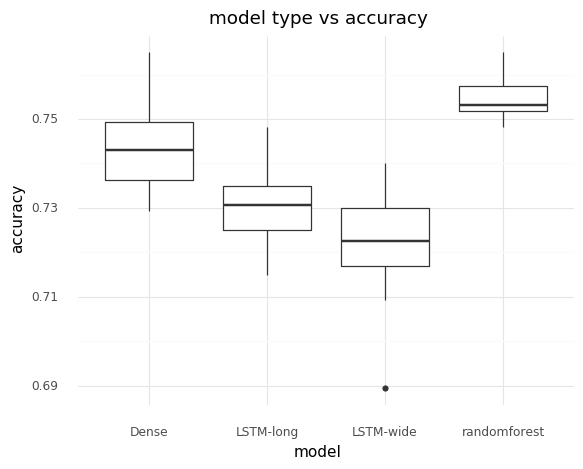

<ggplot: (2932105788141)>

In [63]:
(pn.ggplot(model_results) +
pn.geom_boxplot(pn.aes(x='model', y='accuracy')) +
pn.ggtitle('model type vs accuracy')+
pn.theme_minimal())

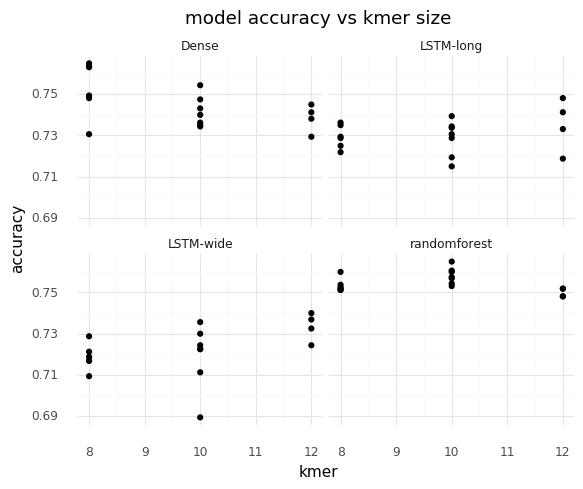

<ggplot: (2932106016505)>

In [65]:
(pn.ggplot(model_results) +
pn.geom_point(pn.aes(x='kmer', y='accuracy')) +
pn.facet_wrap('~ model')+
pn.ggtitle('model accuracy vs kmer size')+
pn.theme_minimal())

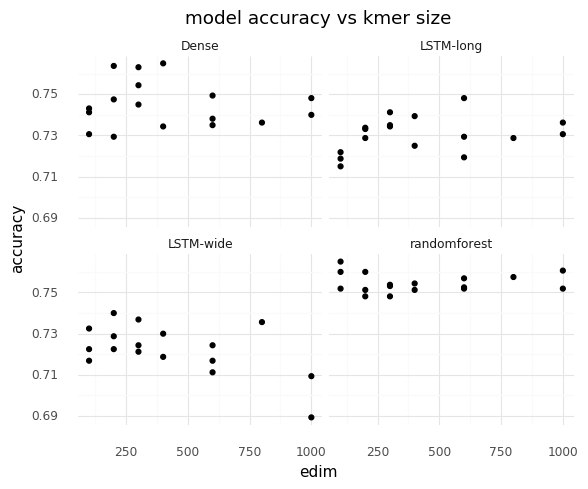

<ggplot: (2932105459777)>

In [66]:
(pn.ggplot(model_results) +
pn.geom_point(pn.aes(x='edim', y='accuracy')) +
pn.facet_wrap('~ model')+
pn.ggtitle('model accuracy vs kmer size')+
pn.theme_minimal())

In [6]:
k=None
if k is None:
    print('asdfasdf')

asdfasdf


In [8]:
import pathlib
pathlib.Path.mkdir?

Signature: pathlib.Path.mkdir(self, mode=511, parents=False, exist_ok=False)
Docstring: Create a new directory at this given path.
File:      /data/swamyvs/anaconda3/lib/python3.7/pathlib.py
Type:      function


In [15]:
pathlib.Path('testing/dir1/dir2/dir3').mkdir( parents=True, exist_ok=True )

In [16]:
pathlib.Path(None).mkdir( parents=True, exist_ok=True)

TypeError: expected str, bytes or os.PathLike object, not NoneType